In [43]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np

url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip"
df_music = pd.read_csv(url)
df_music

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [44]:
df_music.drop(['time_signature'], axis=1)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,0.489


In [45]:
df_music['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [46]:
df_music['genre'].replace("Children’s Music", "Children’s Music", inplace=True)

In [47]:
df_music['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [48]:
df_music= df_music.loc[(df_music['genre'] != 'Soundtrack') & (df_music['genre'] != 'Movie')]

In [49]:
df_music['genre'].value_counts()

Comedy              9681
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

Text(0.5, 1.0, 'Spotify Music Metrics')

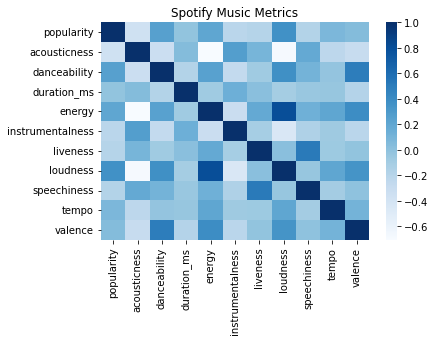

In [50]:
sns.heatmap(df_music.corr(), cmap='Blues')
plt.title("Spotify Music Metrics")

In [51]:
df_music.groupby('artist_name')['popularity'].mean().sort_values(ascending=False) #mean of popularity


n = 10
df_music['artist_name'].value_counts()[:n].index.tolist()  # 3 most popular artists

['Giuseppe Verdi',
 'Giacomo Puccini',
 "Kimbo Children's Music",
 'Nobuo Uematsu',
 'Richard Wagner',
 'Wolfgang Amadeus Mozart',
 'Georges Bizet',
 'Juice Music',
 'Johann Sebastian Bach',
 'Ludwig van Beethoven']

In [52]:
#sorting songs according to their popularity
sorted_df = df_music.sort_values('popularity', ascending = False).head(100)
sorted_two_df = df_music.sort_values('popularity', ascending = True)

sorted_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
107804,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.319
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
9026,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
107802,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9030,Dance,Ariana Grande,NASA,4uTvPEr01pjTbZgl7jcKBD,91,0.4510,0.747,182000,0.458,0.000000,F#,0.2520,-6.891,Major,0.3030,75.029,4/4,0.470
66750,Hip-Hop,Daddy Yankee,Adictiva,6MJUCumnQsQEKbCy28tbCP,91,0.2910,0.788,207853,0.771,0.000056,E,0.1720,-3.206,Minor,0.0563,99.038,4/4,0.701
108198,Pop,Daddy Yankee,Adictiva,6MJUCumnQsQEKbCy28tbCP,91,0.2910,0.788,207853,0.771,0.000056,E,0.1720,-3.206,Minor,0.0563,99.038,4/4,0.701
107825,Pop,benny blanco,Eastside (with Halsey & Khalid),0d2iYfpKoM0QCKvcLCkBao,91,0.5550,0.560,173800,0.680,0.000000,F#,0.1160,-7.648,Minor,0.3210,89.391,4/4,0.319


In [53]:
df_music.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [54]:
sorted_df_1 = sorted_df[['danceability','energy','mode','speechiness','acousticness','instrumentalness','liveness','valence']]
sorted_two_df = sorted_two_df[['danceability','energy','mode','speechiness','acousticness','instrumentalness','liveness','valence']]

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_16964/2064732270.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats = sorted_df_1.mean().tolist()
C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_16964/2064732270.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stats2 = sorted_two_df.mean().tolist()


ValueError: x and y must have same first dimension, but have shapes (8,) and (7,)

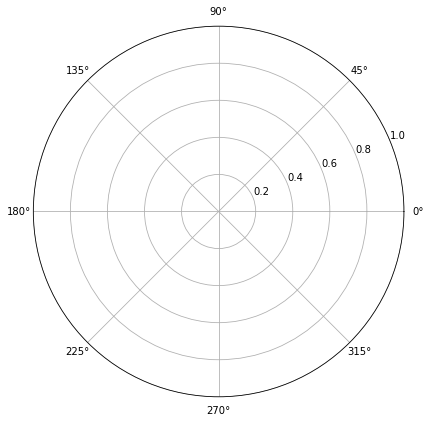

In [55]:
labels = list(sorted_df_1)[:]

stats = sorted_df_1.mean().tolist()

stats2 = sorted_two_df.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)

fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, stats, 'o-', linewidth=3, label = "Popular", color = 'green')
ax.fill(angles, stats, alpha=0.25, facecolor='green')
ax.set_thetagrids(angles * 180/np.pi, labels, fontsize = 12)

ax.set_rlabel_position(250)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7], ["0.1", "0.2", "0.3", "0.4", "0.5","0.6", "0.7" ], size=12)
plt.ylim(0,0.7)

ax.plot(angles, stats2, 'o-', linewidth=2, label = "All The Dataset", color= 'red')
ax.fill(angles, stats2, alpha=0.25, facecolor='red')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1,0.1))

In [56]:
df_music.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [58]:
df_music.corr(method='pearson')

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.355911,0.249355,-0.017508,0.211830,-0.217242,-0.186511,0.361821,-0.174084,0.075693,0.044637
acousticness,-0.355911,1.000000,-0.319411,0.045207,-0.705311,0.268818,0.096053,-0.684575,0.186531,-0.229280,-0.292286
danceability,0.249355,-0.319411,1.000000,-0.174933,0.242831,-0.261989,-0.076808,0.370906,0.108641,-0.025812,0.496204
duration_ms,-0.017508,0.045207,-0.174933,1.000000,-0.073671,0.139375,0.016383,-0.103525,-0.042563,-0.037485,-0.179726
energy,0.211830,-0.705311,0.242831,-0.073671,1.000000,-0.307850,0.182056,0.801218,0.130780,0.209893,0.389045
instrumentalness,-0.217242,0.268818,-0.261989,0.139375,-0.307850,1.000000,-0.110825,-0.443437,-0.157910,-0.071709,-0.214210
liveness,-0.186511,0.096053,-0.076808,0.016383,0.182056,-0.110825,1.000000,0.015762,0.518445,-0.064729,-0.015219
loudness,0.361821,-0.684575,0.370906,-0.103525,0.801218,-0.443437,0.015762,1.000000,-0.032652,0.211277,0.344497
speechiness,-0.174084,0.186531,0.108641,-0.042563,0.130780,-0.157910,0.518445,-0.032652,1.000000,-0.096155,-0.005759
tempo,0.075693,-0.229280,-0.025812,-0.037485,0.209893,-0.071709,-0.064729,0.211277,-0.096155,1.000000,0.107658


In [59]:
df_music.skew()

C:\Users\UTILIS~1\AppData\Local\Temp/ipykernel_16964/1728165026.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_music.skew()


popularity         -0.370466
acousticness        0.673275
danceability       -0.357865
duration_ms         9.905129
energy             -0.485500
instrumentalness    2.159198
liveness            2.031812
loudness           -1.834965
speechiness         3.229410
tempo               0.399478
valence             0.116416
dtype: float64

In [ ]:
()